Import and download necessary libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

ImportError: libGL.so.1: cannot open shared object file: No such file or directory

read the image and perform grayscale.
Using HoughLines, we detect the lines in the image

In [ ]:
image = cv2.imread("sudoku.png")
# convert to grayscale
grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 # perform edge detection
edges = cv2.Canny(grayscale, 10, 20)
 # detect lines in the image using hough lines technique
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 60, np.array([]), 50, 5)

array represents the x1 y1 and x2 y2 values.

In [ ]:
print(lines)

[[[  1 499 899 499]]

 [[  1  99 899  99]]

 [[ 99 899  99   1]]

 [[597 899 597   1]]

 [[603   1 899   1]]

 [[603 501 899 501]]

 [[199 899 199   1]]

 [[701 899 701   2]]

 [[799 899 799   2]]

 [[603 799 899 799]]

 [[303 899 303   1]]

 [[499 899 499   1]]

 [[399 899 399   1]]

 [[297 899 297   1]]

 [[899 898 899   2]]

 [[  1 303 296 303]]

 [[304 101 596 101]]

 [[603 597 898 597]]

 [[  1 899   1 304]]

 [[201 899 201 304]]

 [[  1 297 296 297]]

 [[603 201 898 201]]

 [[603 899 603 603]]

 [[304 199 596 199]]

 [[604 699 898 699]]

 [[603 401 898 401]]

 [[101 296 101   1]]

 [[304 801 596 801]]

 [[501 899 501   1]]

 [[604 701 898 701]]

 [[699 899 699 603]]

 [[304 399 596 399]]

 [[801 899 801 603]]

 [[304 603 596 603]]

 [[897 899 897 603]]

 [[401 899 401 604]]

 [[  2 897 296 897]]

 [[  2 899 296 899]]

 [[702 303 758 303]]

 [[345 899 400 899]]

 [[  1 199 296 199]]

 [[654 297 710 297]]

 [[ 42 399 101 400]]

 [[  2 801 296 801]]

 [[304 701 596 701]]

 [[603 101

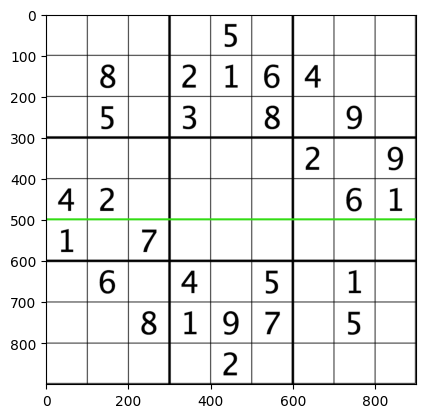

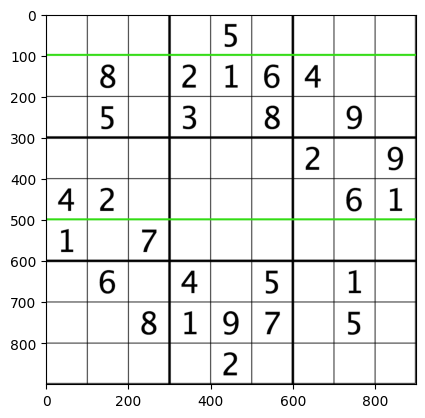

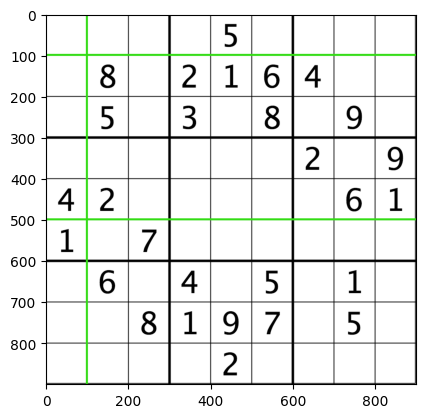

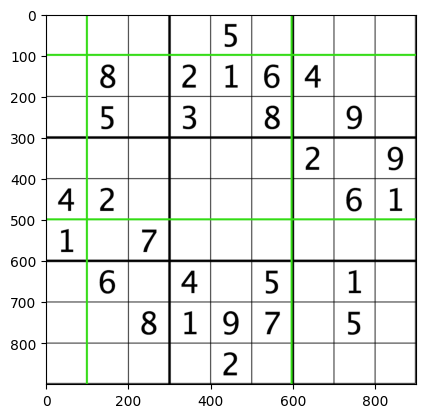

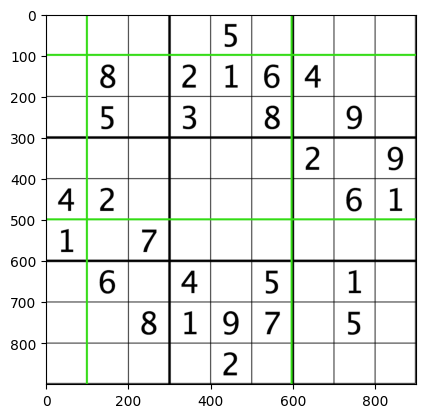

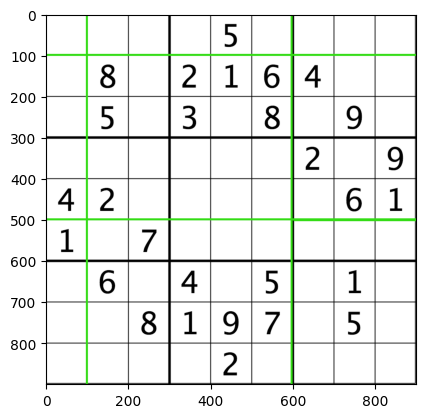

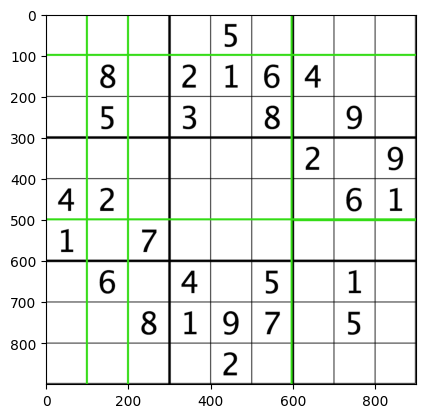

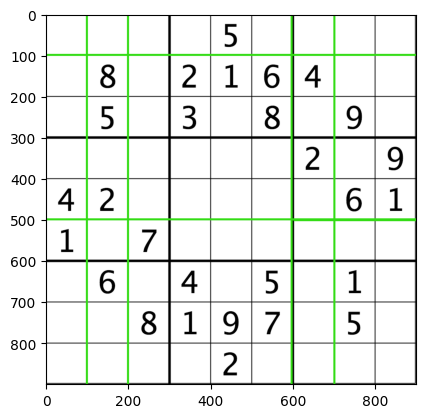

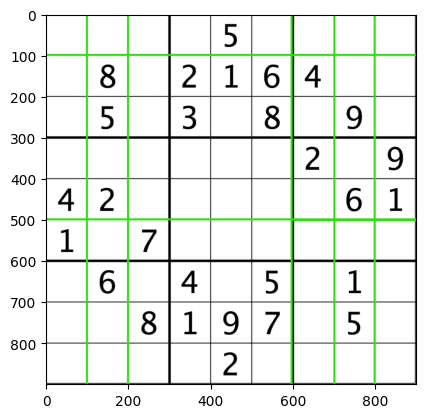

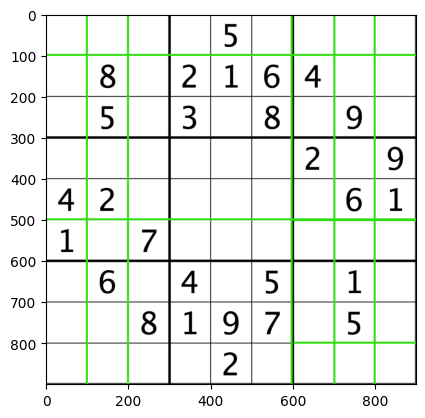

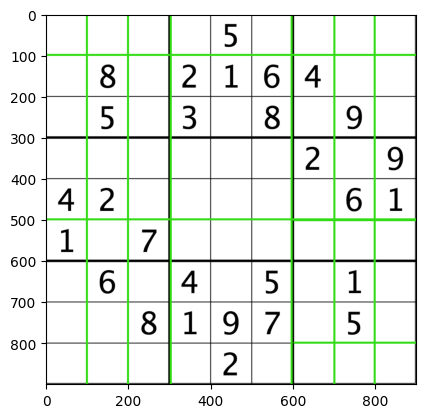

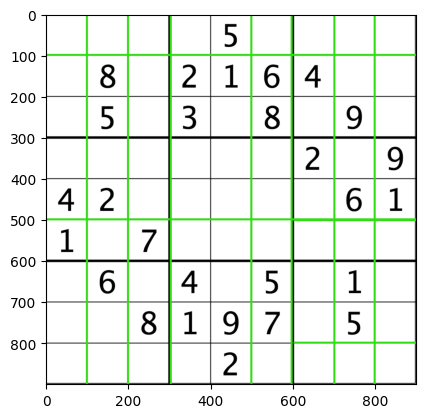

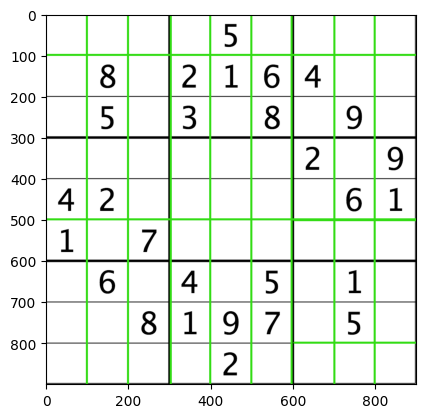

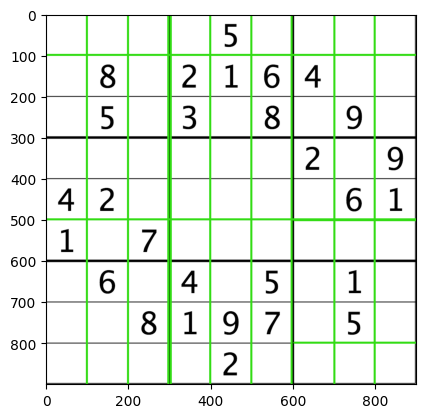

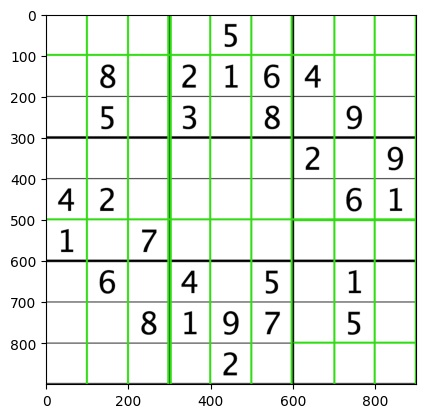

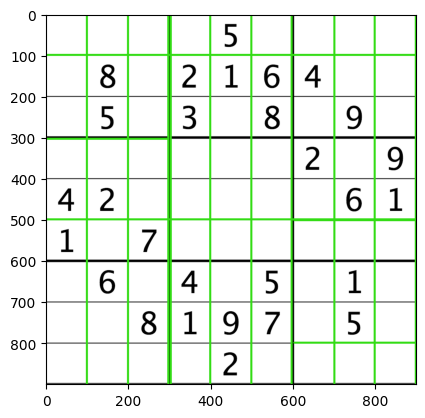

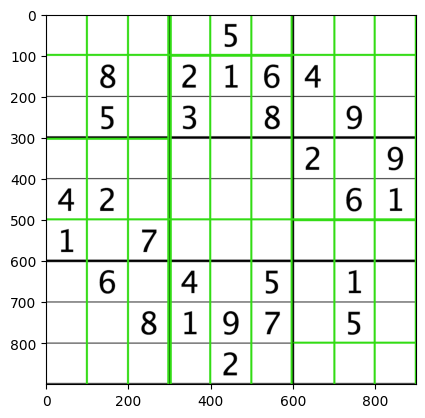

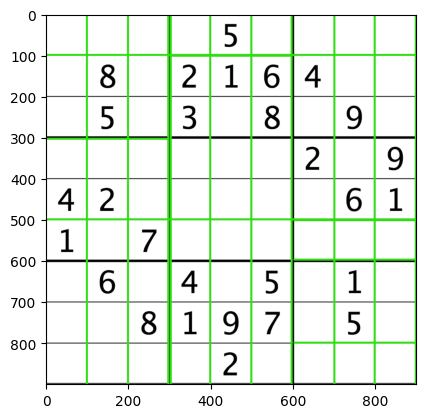

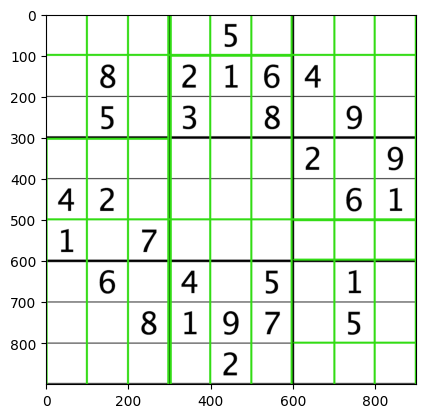

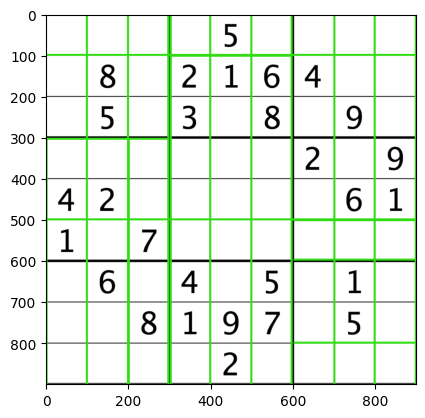

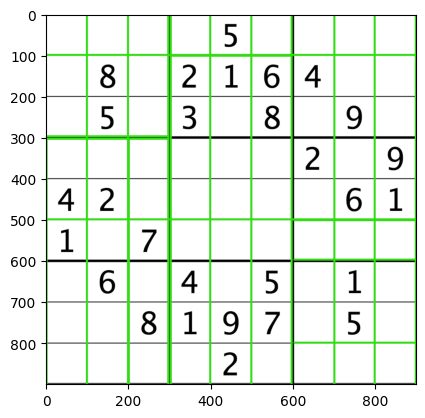

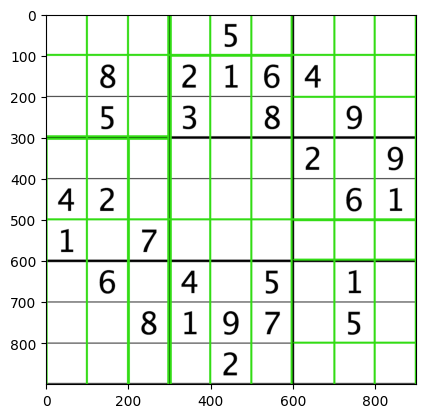

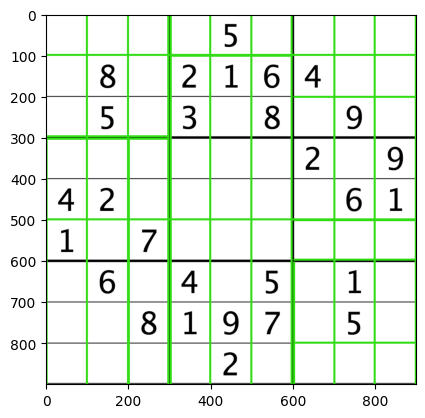

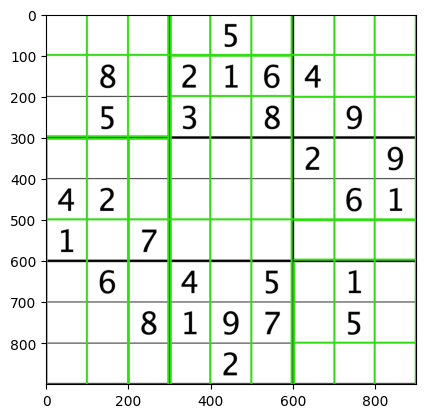

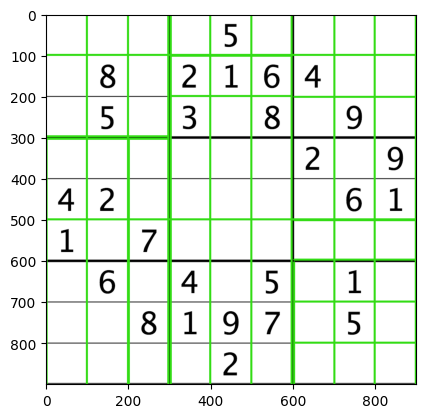

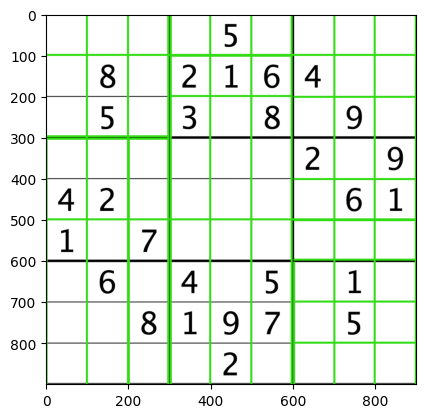

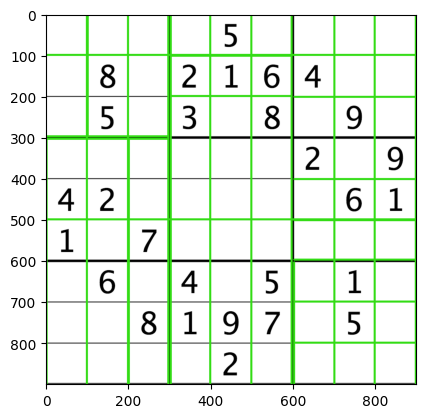

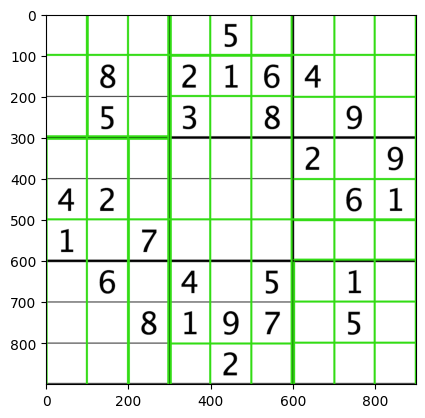

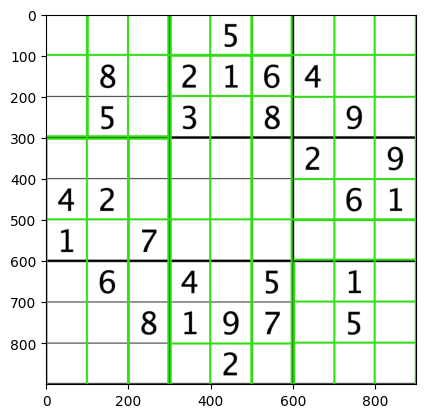

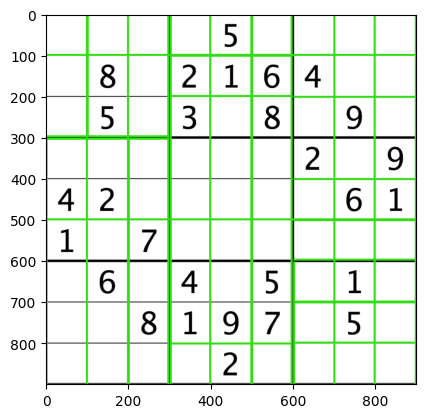

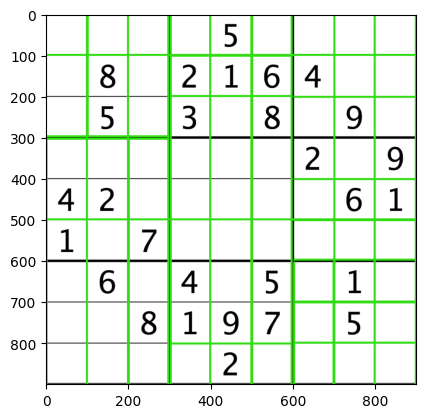

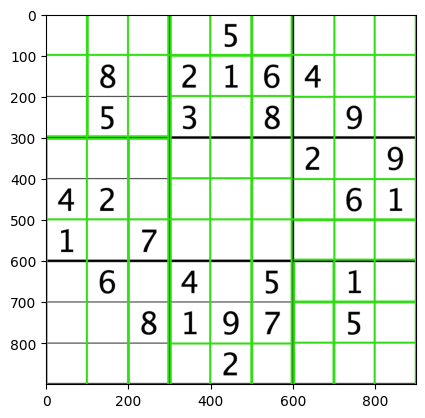

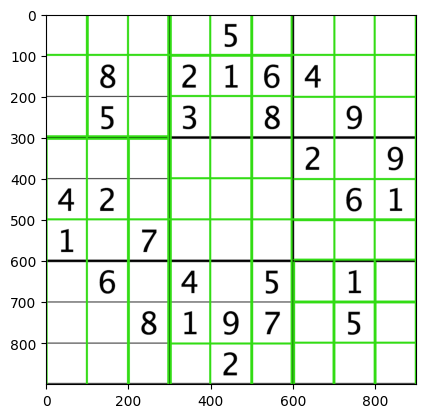

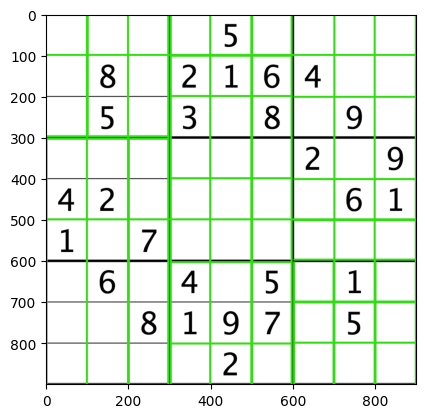

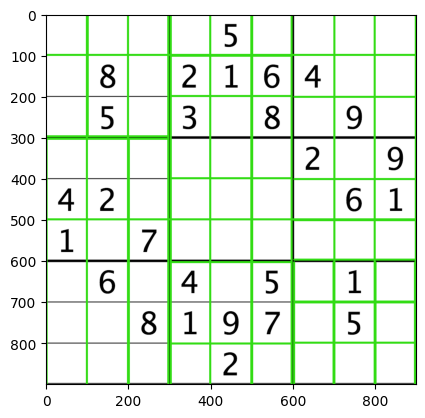

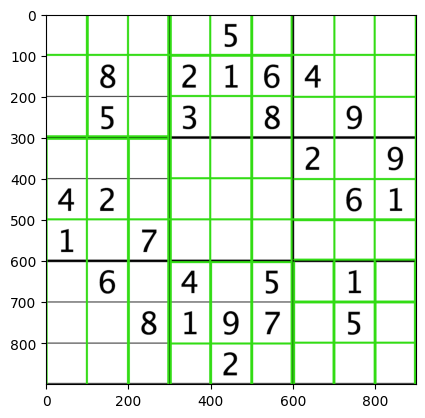

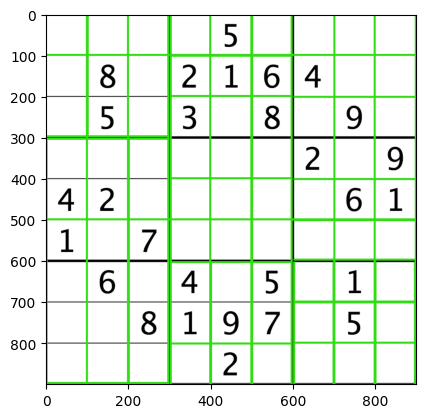

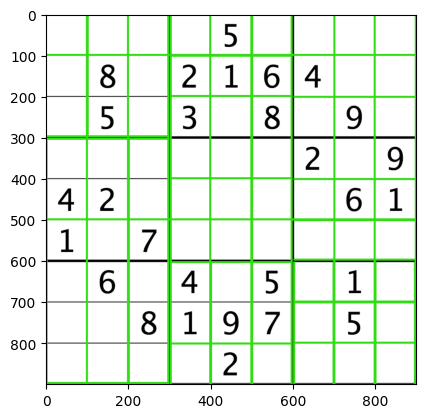

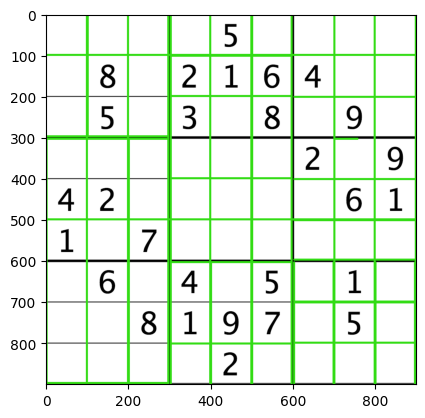

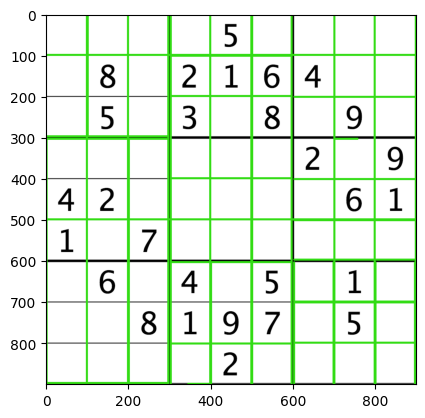

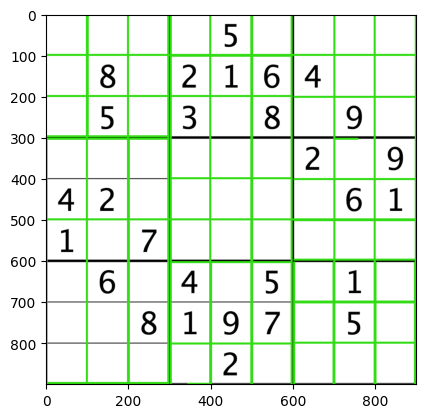

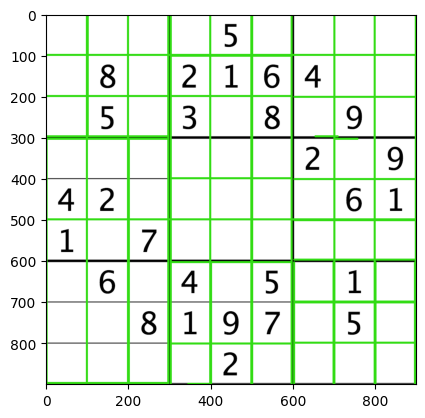

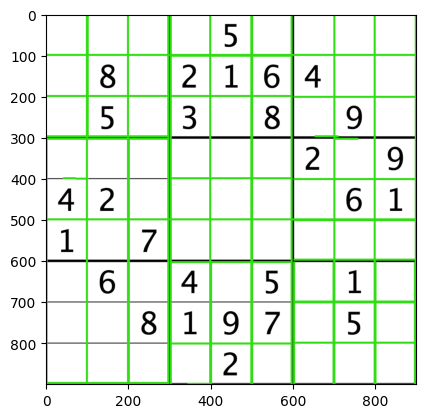

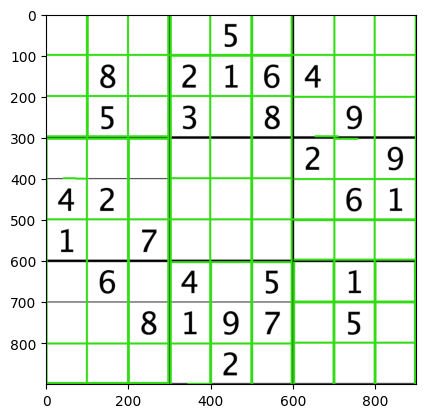

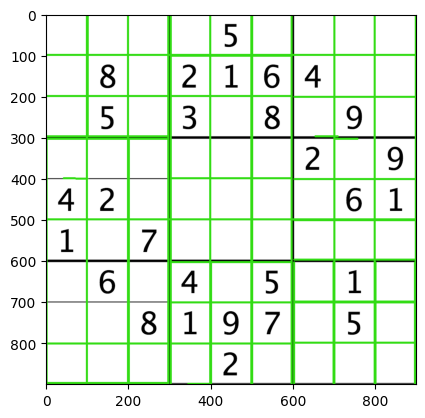

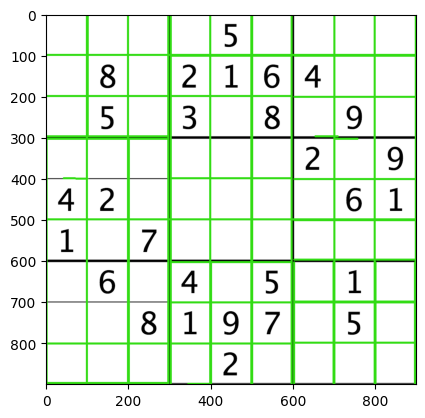

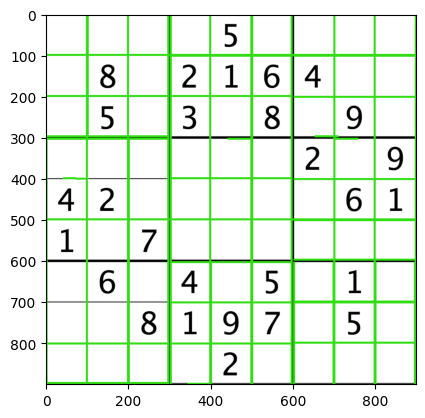

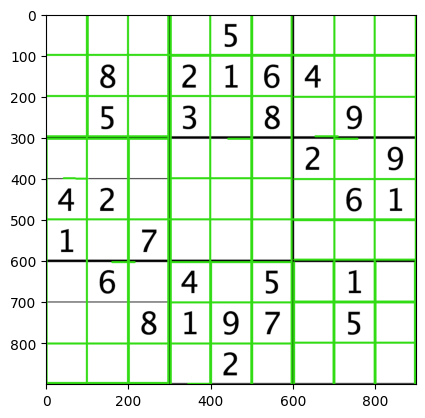

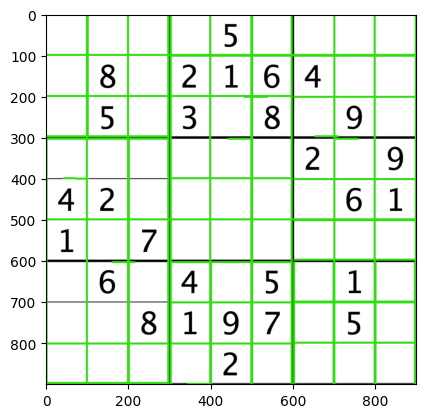

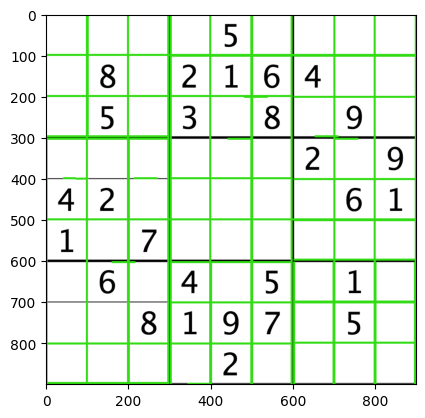

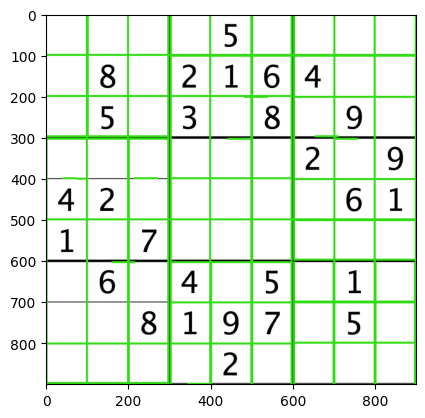

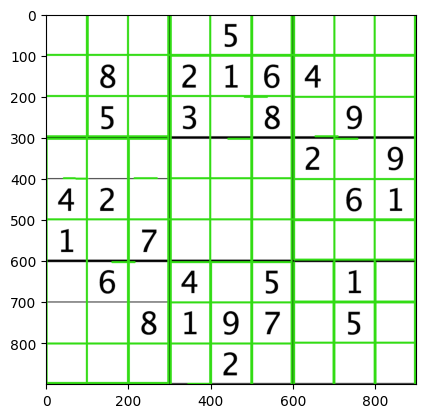

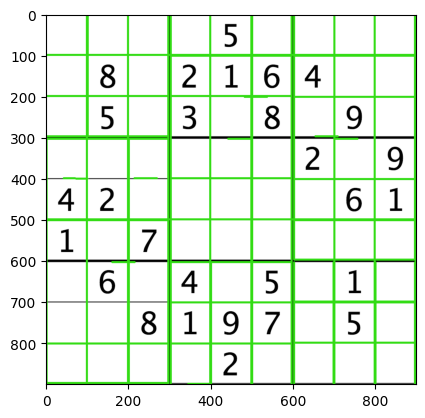

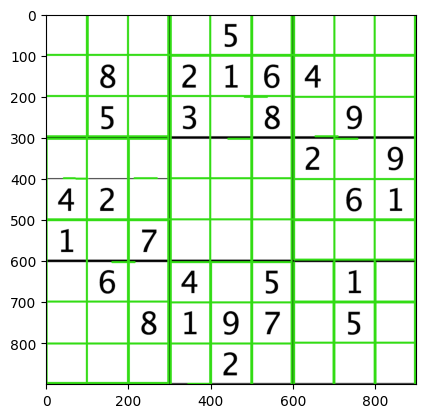

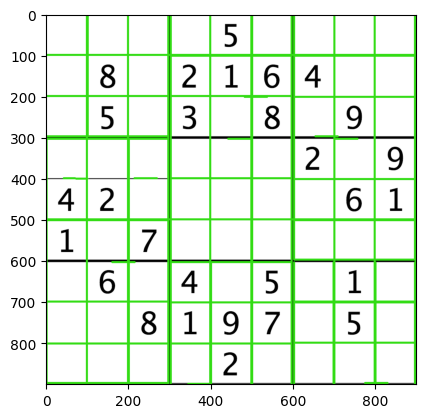

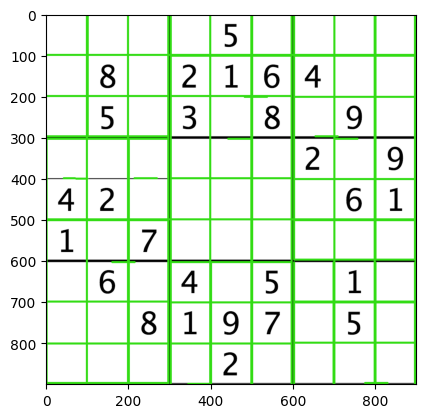

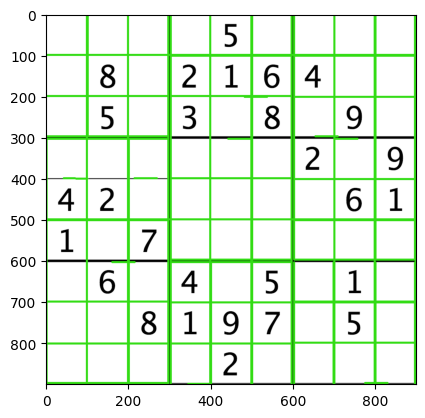

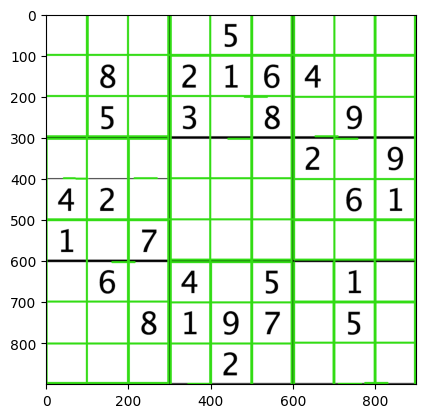

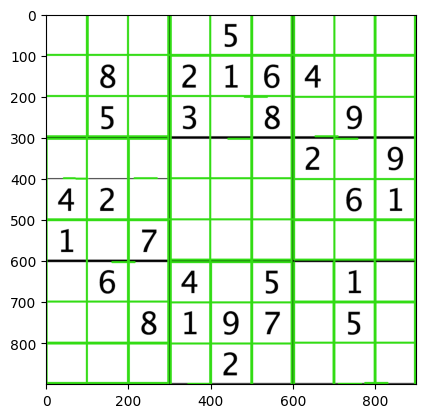

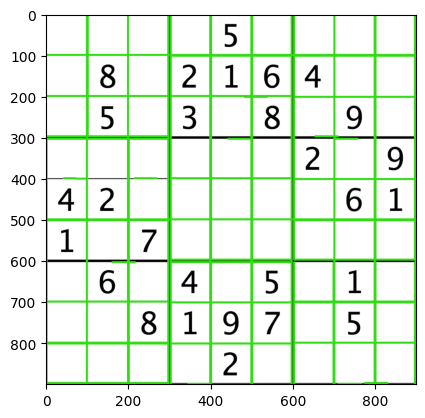

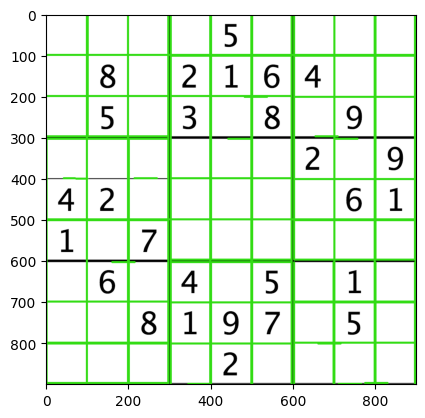

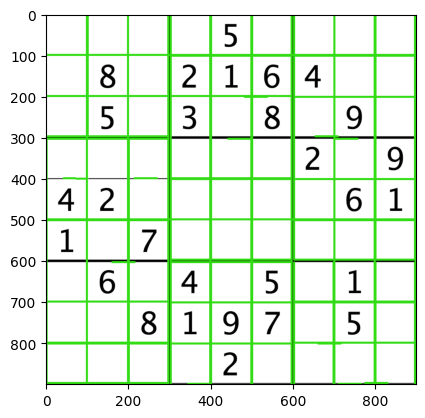

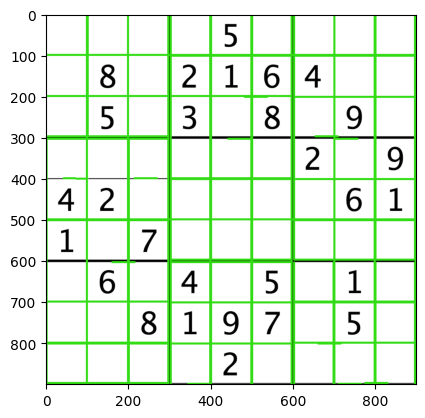

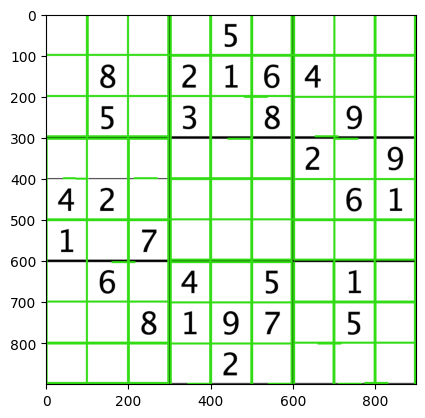

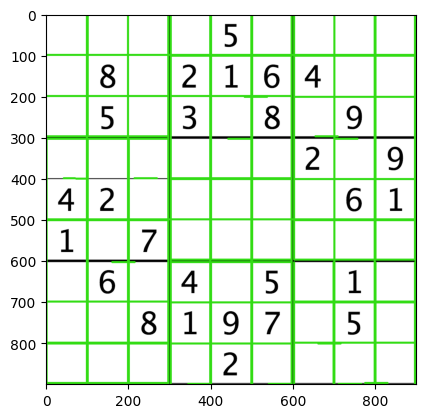

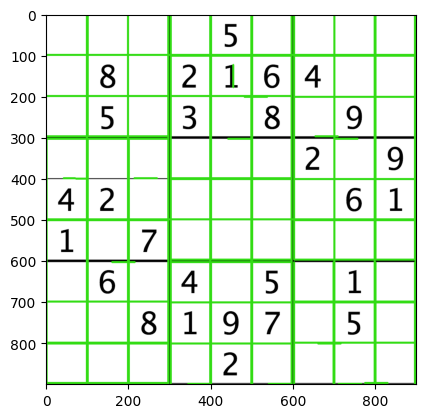

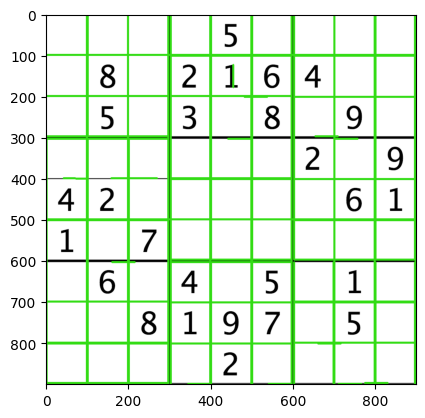

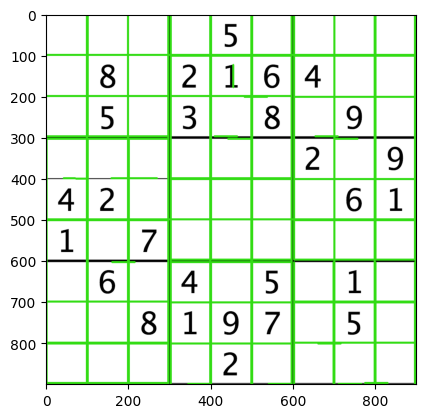

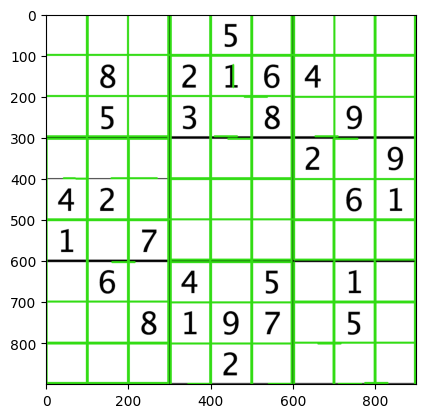

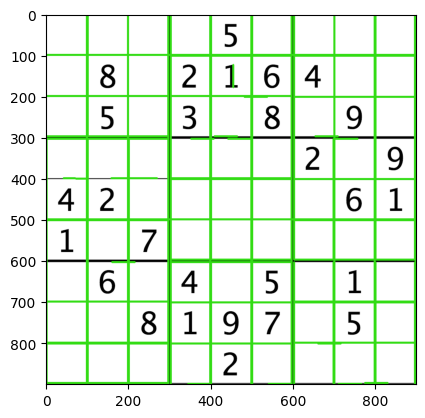

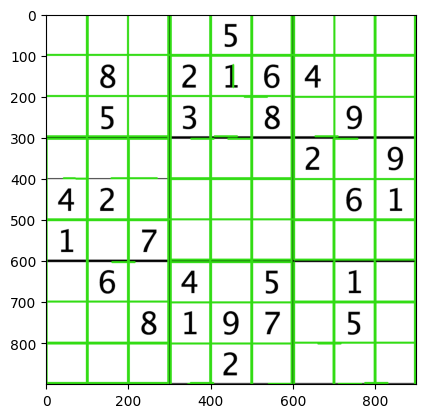

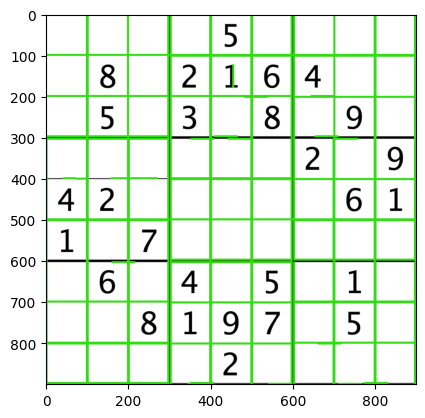

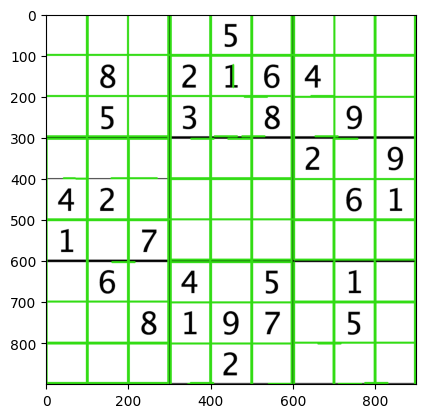

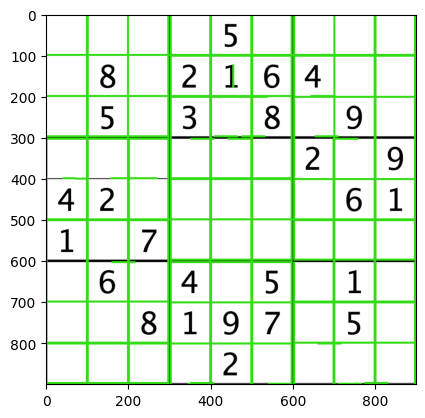

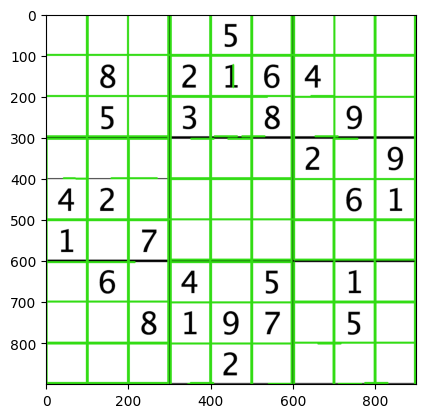

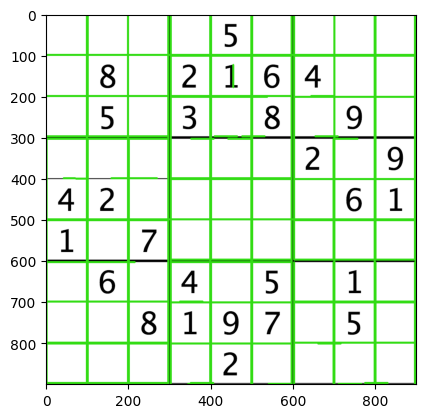

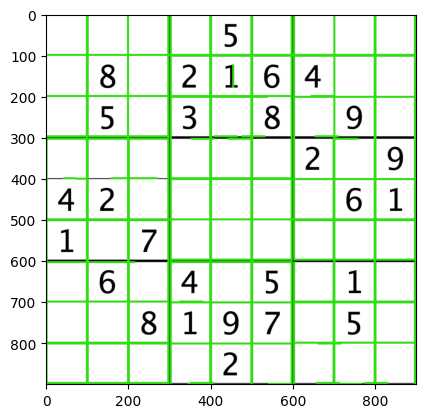

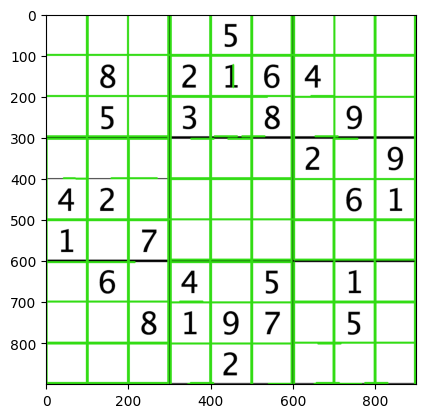

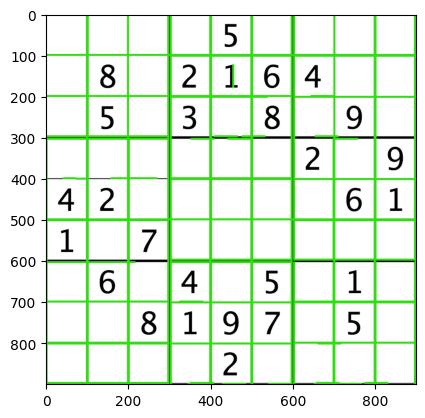

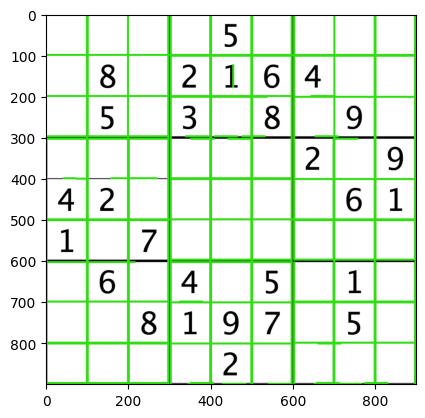

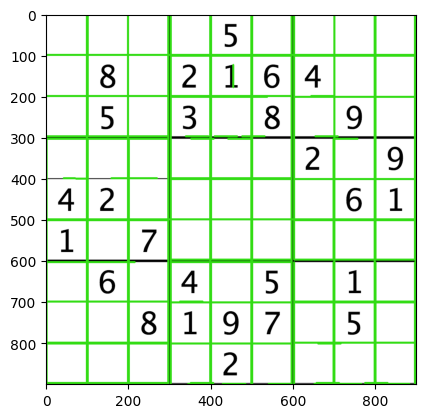

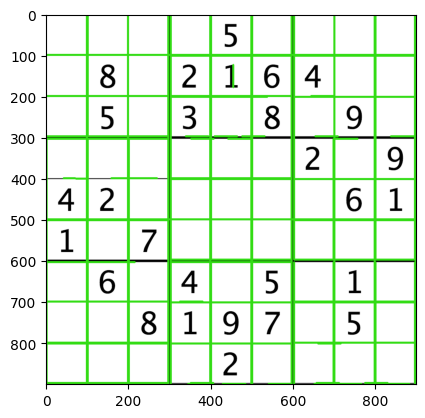

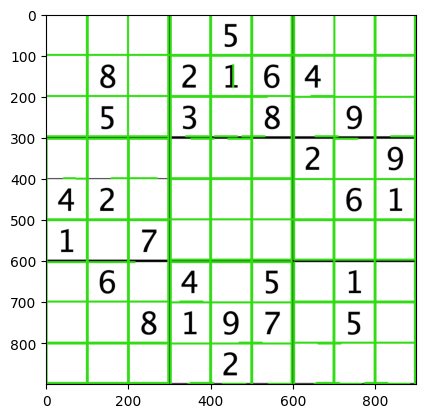

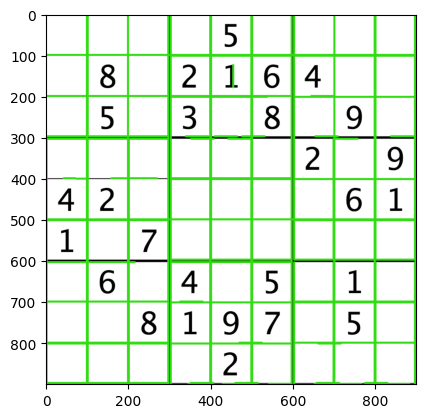

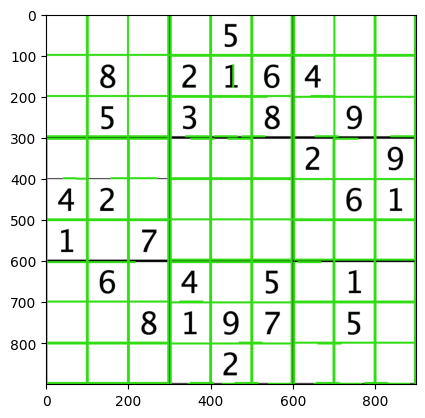

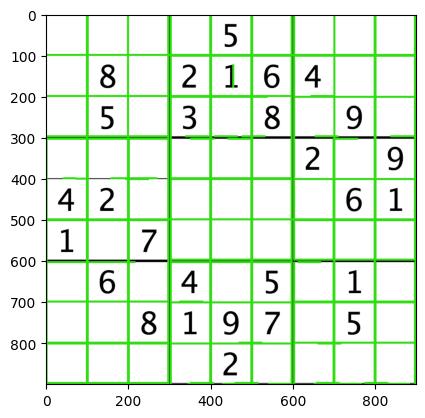

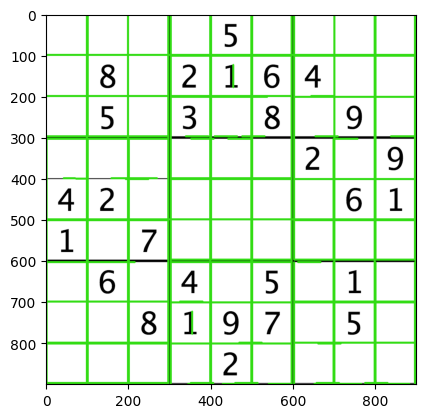

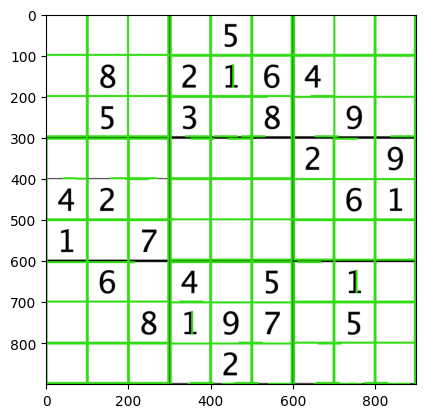

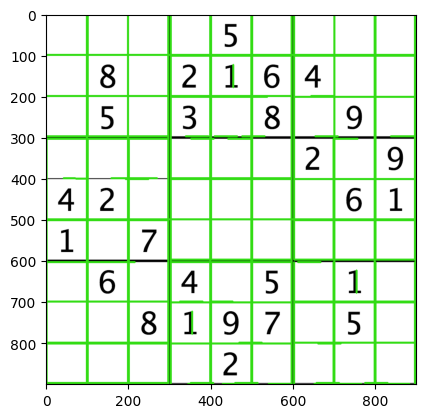

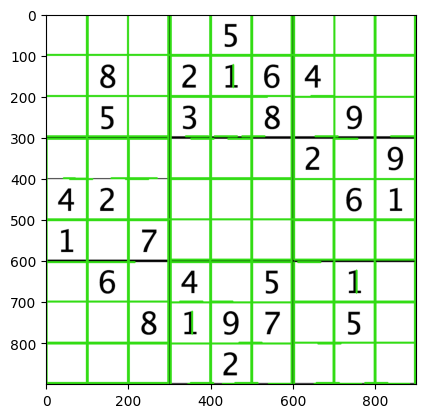

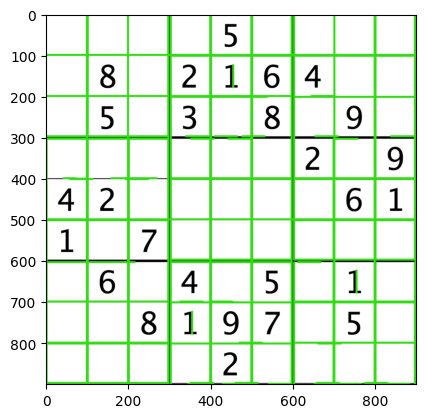

In [ ]:
# iterate over the output lines and draw them
for line in lines:
  for x1, y1, x2, y2 in line:
    #the numbers are colors for the line
    cv2.line(image, (x1, y1), (x2, y2), (50, 220, 20), 3)
    # show the image
    plt.imshow(image)
    plt.show()

Draw the circle detection on colonies-02

Number of circles detected: 21


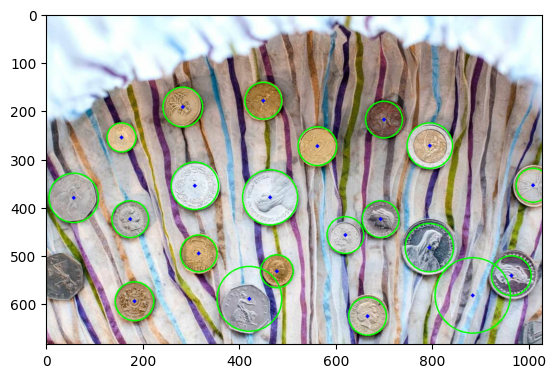

In [ ]:
# load the image
img = cv2.imread("coins.jpg")
# convert BGR to RGB to be suitable for showing using matplotlib library
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# make a copy of the original image
cimg = img.copy()
# convert image to grayscale
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# apply a blur using the median filter
img = cv2.medianBlur(img, 5)
# finds the circles in the grayscale image using the Hough transform
circles = cv2.HoughCircles(image=img, method=cv2.HOUGH_GRADIENT, dp=0.9, minDist=80, param1=110, param2=39, maxRadius=90)
for co, i in enumerate(circles[0, :], start=1):
    # draw the outer circle in green
    cv2.circle(cimg,(int(i[0]),int(i[1])),int(i[2]),(0,255,0),2)
    # draw the center of the circle in blue
    cv2.circle(cimg,(int(i[0]),int(i[1])),2,(0,0,255),3)
# print the number of circles detected
print("Number of circles detected:", co)
# save the image, convert to BGR to save with proper colors
# cv2.imwrite("coins_circles_detected.png", cimg)
# show the image
plt.imshow(cimg)
plt.show()

Detect contours from image

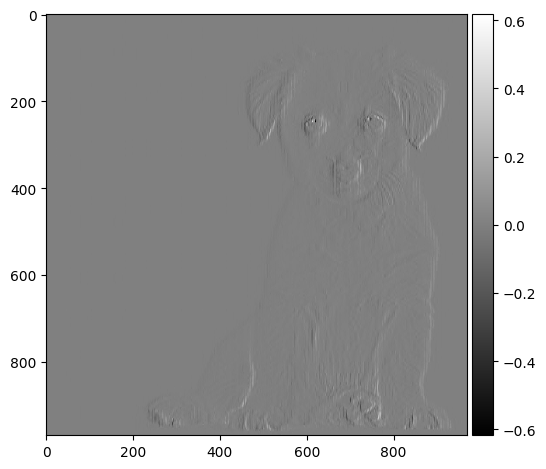

In [ ]:
#importing the required libraries
import numpy as np
from skimage.io import imread, imshow
from skimage.filters import prewitt_h,prewitt_v
import matplotlib.pyplot as plt
%matplotlib inline
#reading the image
image = imread('puppy.jpg',as_gray=True)
#calculating horizontal edges using prewitt kernel
edges_prewitt_horizontal = prewitt_h(image)
#calculating vertical edges using prewitt kernel
edges_prewitt_vertical = prewitt_v(image)
imshow(edges_prewitt_vertical, cmap='gray')


Use HOG on the image

(2457, 3068, 3)


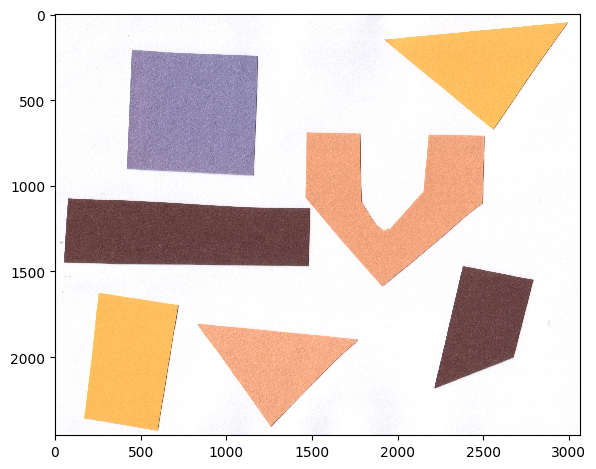

In [ ]:
#importing required libraries
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
%matplotlib inline

#reading the image
img = imread('shapes-01.jpg')
imshow(img)
print(img.shape)

(64, 64, 3)


<ipython-input-28-145ceb043bea>:7: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),


(1764,)

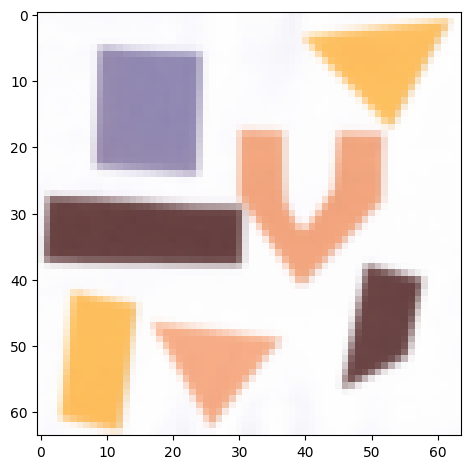

In [ ]:
#resizing image
resized_img = resize(img, (64,64))
imshow(resized_img)
print(resized_img.shape)

#creating hog features
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True, multichannel=True)
fd.shape


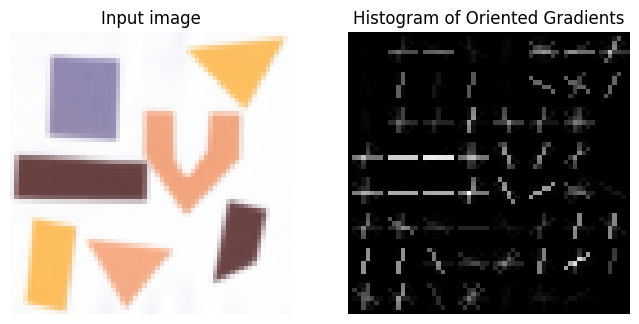

In [ ]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
ax1.axis('off')
ax1.imshow(resized_img, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()